<a href="https://colab.research.google.com/github/amaeda1967/Training/blob/master/BERT_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install transformers

     |████████████████████████████████| 1.3MB 7.0MB/s 
     |████████████████████████████████| 1.1MB 28.2MB/s 
     |████████████████████████████████| 2.9MB 43.6MB/s 
     |████████████████████████████████| 890kB 31.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=07b28a9b7d1ab0df0bd6a2a87ea494e4ec80df10dc1591136ee9065d568ea4c6
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [3]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
import torch
from transformers import BertTokenizer, BertModel

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [7]:
vocablist = list(tokenizer.vocab.keys())

In [8]:
len(vocablist)

30522

In [8]:
#text = "After stealing money from the bank vault, the bank robber was seen fishing on the Mississippi river bank."

In [9]:
#tokenized_text = tokenizer.tokenize(text)

In [10]:
#indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

In [13]:
#segment_ids = [1]*len(tokenized_text)

In [14]:
#token_tensor = torch.tensor(indexed_tokens)
#segments_tensor = torch.tensor(segment_ids)

In [9]:
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True, output_attentions = True)

In [10]:
word_embeddings = model.embeddings.word_embeddings.weight

In [11]:
def get_vec(x):
  idx = tokenizer.convert_tokens_to_ids(x)
  vec = word_embeddings[idx].detach().numpy()
  return vec

In [12]:
def cosin_sim(x, y):
  import numpy as np
  d = np.dot(x, y)/np.linalg.norm((x)*np.linalg.norm(y))
  return d

In [13]:
veclist = word_embeddings.detach().numpy()

In [14]:
veclist.shape

(30522, 768)

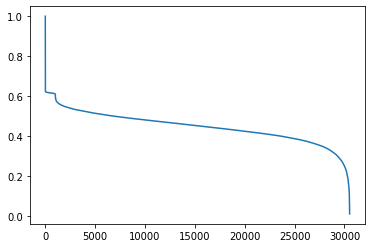

In [71]:
#plt.plot(np.sort(simlist)[::-1])

(array([1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 0.000e+00, 6.000e+00,
        3.000e+00, 5.000e+00, 8.000e+00, 8.000e+00, 9.000e+00, 9.000e+00,
        1.300e+01, 1.900e+01, 2.200e+01, 2.400e+01, 1.900e+01, 3.200e+01,
        3.600e+01, 3.900e+01, 4.600e+01, 4.900e+01, 6.700e+01, 8.400e+01,
        9.600e+01, 1.090e+02, 1.310e+02, 1.710e+02, 1.590e+02, 1.950e+02,
        2.400e+02, 2.810e+02, 3.460e+02, 4.000e+02, 5.480e+02, 6.350e+02,
        7.310e+02, 9.120e+02, 1.046e+03, 1.254e+03, 1.471e+03, 1.598e+03,
        1.662e+03, 1.706e+03, 1.791e+03, 1.759e+03, 1.806e+03, 1.753e+03,
        1.634e+03, 1.446e+03, 1.254e+03, 1.094e+03, 9.210e+02, 7.160e+02,
        5.160e+02, 3.220e+02, 1.980e+02, 7.400e+01, 2.700e+01, 7.000e+00,
        1.850e+02, 8.120e+02, 4.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

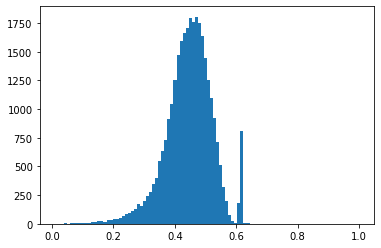

In [72]:
#plt.hist(simlist, bins = 100)

In [29]:
#np.sort(simlist)[::-1][150:200]

array([0.46202365, 0.46194199, 0.46185449, 0.46180519, 0.46170318,
       0.46168679, 0.46167156, 0.4616015 , 0.46153682, 0.46141204,
       0.46135867, 0.46132636, 0.46125764, 0.46124479, 0.46123236,
       0.46115601, 0.46088454, 0.4607912 , 0.46073765, 0.46070075,
       0.4606584 , 0.46046093, 0.46029261, 0.46024671, 0.46019873,
       0.46018198, 0.46017587, 0.46015686, 0.45996058, 0.4599497 ,
       0.45990109, 0.45978105, 0.45970216, 0.4596796 , 0.45947236,
       0.45942011, 0.45929694, 0.45929039, 0.45928961, 0.45927814,
       0.45922357, 0.45920452, 0.45918965, 0.4591876 , 0.45917985,
       0.45915926, 0.45914266, 0.45909905, 0.45909068, 0.45905381])

In [15]:
t = get_vec('father')

simlist = np.zeros(len(veclist),)

for i in range(len(veclist)):
  simlist[i] = cosin_sim(t, veclist[i])

closestwords = np.argsort(simlist)[::-1]

n = 20
top_n = closestwords[0:20]
for i in range(len(top_n)):
  word = tokenizer.convert_ids_to_tokens(top_n[i].item())
  similarity = simlist[top_n[i].item()]
  print(i, word, similarity)

0 father 1.0000001192092896
1 mother 0.7439195513725281
2 dad 0.6255789399147034
3 brother 0.6254437565803528
4 grandfather 0.6155560612678528
5 fathers 0.5951598882675171
6 parents 0.5889931917190552
7 grandmother 0.5596255660057068
8 uncle 0.5566222071647644
9 son 0.5445084571838379
10 stepfather 0.52768874168396
11 sister 0.5120916366577148
12 daddy 0.5066556334495544
13 husband 0.4979468286037445
14 mothers 0.49515825510025024
15 mom 0.49314430356025696
16 godfather 0.489383727312088
17 daughter 0.48465752601623535
18 wife 0.4750252068042755
19 uncles 0.47393202781677246


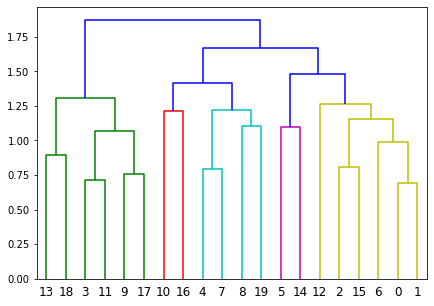

In [16]:
z = np.zeros((20, 768))

for i in range(20):
  z[i] = veclist[closestwords[i]]

z = linkage (z, method='ward')

fig = plt.figure(figsize=(7,5))
dn = dendrogram(z)

In [22]:
def word_strucure(x):
  t = get_vec(x)
  simlist = np.zeros(len(veclist),)

  for i in range(len(veclist)):
    simlist[i] = cosin_sim(t, veclist[i])

  closestwords = np.argsort(simlist)[::-1]

  n = 20
  top_n = closestwords[0:20]
  for i in range(len(top_n)):
    word = tokenizer.convert_ids_to_tokens(top_n[i].item())
    similarity = simlist[top_n[i].item()]
    print(i, word, similarity)

  z = np.zeros((20, 768))

  for i in range(20):
    z[i] = veclist[closestwords[i]]

  z = linkage (z, method='ward')

  fig = plt.figure(figsize=(7,5))
  dn = dendrogram(z, orientation='right')

0 anger 1.0
1 angered 0.6303508281707764
2 rage 0.6218692064285278
3 angry 0.6156224012374878
4 enraged 0.6008555889129639
5 fury 0.5905414819717407
6 resentment 0.580786406993866
7 outrage 0.5784003734588623
8 annoyance 0.5684346556663513
9 irritation 0.5646107792854309
10 outraged 0.5540935397148132
11 frustration 0.552736222743988
12 hostility 0.5424672961235046
13 annoyed 0.5386446118354797
14 irritated 0.537519097328186
15 hatred 0.5357582569122314
16 angrily 0.5333356857299805
17 disgust 0.5297354459762573
18 displeasure 0.5284353494644165
19 bitterness 0.5273690819740295


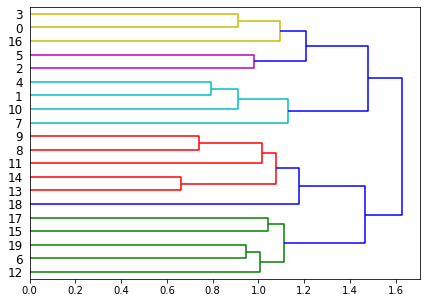

In [23]:
word_strucure('anger')

0 life 1.0
1 lives 0.5412790179252625
2 living 0.4547620713710785
3 world 0.41100814938545227
4 ##life 0.41097602248191833
5 career 0.4094410240650177
6 lifetime 0.40522491931915283
7 670 0.3883271813392639
8 259 0.38741999864578247
9 241 0.38620278239250183
10 live 0.38504883646965027
11 270 0.3850432336330414
12 people 0.38494694232940674
13 332 0.38395440578460693
14 191 0.38382449746131897
15 352 0.3837426006793976
16 308 0.38370034098625183
17 251 0.3835313618183136
18 530 0.38341471552848816
19 305 0.38337790966033936


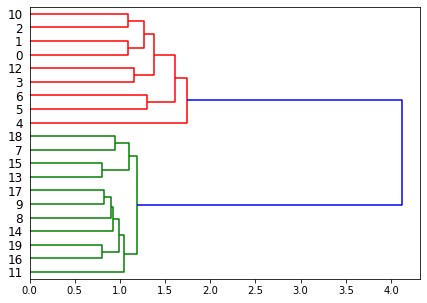

In [24]:
word_strucure('life')

0 money 1.0
1 funds 0.5610285401344299
2 cash 0.5269374251365662
3 financial 0.4848286211490631
4 finances 0.4774763882160187
5 funding 0.46526727080345154
6 wealth 0.4572276771068573
7 740 0.44388166069984436
8 financing 0.44353172183036804
9 finance 0.4398762583732605
10 riches 0.43581700325012207
11 780 0.43206799030303955
12 197 0.4320399761199951
13 193 0.42898812890052795
14 187 0.42879876494407654
15 dollars 0.4275365173816681
16 198 0.42719292640686035
17 284 0.4262833595275879
18 monetary 0.4262518584728241
19 670 0.42569538950920105


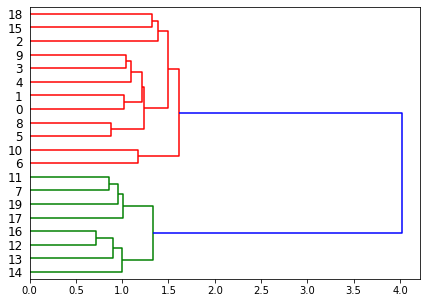

In [25]:
word_strucure('money')

0 happiness 1.0
1 sadness 0.6013122797012329
2 thrilled 0.6009552478790283
3 loneliness 0.5996324419975281
4 prosperous 0.5937967300415039
5 delightful 0.5931323766708374
6 cheerful 0.5890178084373474
7 1726 0.5824870467185974
8 prosperity 0.5813698768615723
9 enjoyment 0.5808872580528259
10 happier 0.5776124000549316
11 delighted 0.5757561922073364
12 excitement 0.575107753276825
13 longevity 0.5749184489250183
14 optimism 0.5734183192253113
15 pleasures 0.5733094215393066
16 happy 0.5723934173583984
17 48th 0.5719704031944275
18 adored 0.5708325505256653
19 astonishment 0.5705713033676147


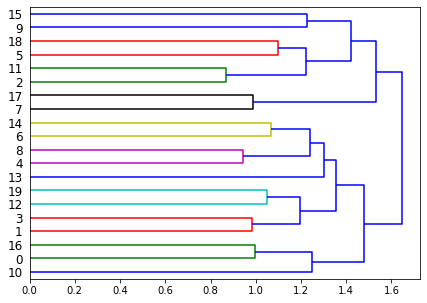

In [26]:
word_strucure('happiness')